<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"  
  "http://www.w3.org/TR/html4/loose.dtd">  
<html > 
<head> 
<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1"> 
<meta name="generator" content="TeX4ht (http://www.tug.org/tex4ht/)"> 
<meta name="originator" content="TeX4ht (http://www.tug.org/tex4ht/)"> 
<!-- html --> 
<link rel="stylesheet" type="text/css" href="logaritmo_discreto.css"> 
</head><body 
>
<div class="maketitle"><h2 class="titleHead">Logaritmo discreto</h2>
<div class="author" ></div><br />
<div class="date" ><span 
class="cmr-12">11 de noviembre de 2022</span></div>
   </div>
   <p>
   <div class="tableofcontents">
   <span class="sectionToc" >1 <a 
href="#x1-20001" id="QQ2-1-2">Introducción</a></span>
<br />   &#x00A0;<span class="subsectionToc" >1.1 <a 
href="#x1-30001.1" id="QQ2-1-3">Diffie-Helmman en <span 
class="msbm-10x-x-109">&#x2124;</span><sub><span 
class="cmmi-8">p</span></sub></a></span>
<br />   &#x00A0;<span class="subsectionToc" >1.2 <a 
href="#x1-40001.2" id="QQ2-1-4">ElGamal en <span 
class="msbm-10x-x-109">&#x2124;</span><sub><span 
class="cmmi-8">p</span></sub></a></span>
<br />   &#x00A0;<span class="subsectionToc" >1.3 <a 
href="#x1-40001.3" id="QQ2-1-DSA">The Digital Signature Algorithm (DSA)</a></span>
<br />    &#x00A0;<span class="subsectionToc" >1.4 <a 
href="#x1-50001.3" id="QQ2-1-5">El problema del logaritmo discreto</a></span>
<br />   
<span class="sectionToc" >2 <a 
href="#x1-100003" id="QQ2-1-10">Cálculo del logaritmo discreto</a></span>
<br />   &#x00A0;<span class="subsectionToc" >2.1 <a 
href="#x1-110003.1" id="QQ2-1-11">Baby-step, Giant-step</a></span>
<br />   &#x00A0;<span class="subsectionToc" >2.2 <a 
href="#x1-130003.3" id="QQ2-1-13">Index calculus</a></span>
<br />   
<span class="sectionToc" >3 <a 
href="#x1-140004" id="QQ2-1-14">Curvas Elípticas</a></span>
<br />   &#x00A0;<span class="subsectionToc" >3.1 <a 
href="#x1-150004.1" id="QQ2-1-15">Curvas elípticas sobre <span 
class="msbm-10x-x-109">F</span><sub><span 
class="cmmi-8">p</span></sub></a></span>
<br />   &#x00A0;<span class="subsectionToc" >3.2 <a 
href="#x1-170004.3" id="QQ2-1-18">Teorema de Hasse. Orden de un punto</a></span>
<br />   &#x00A0;<span class="subsectionToc" >3.3 <a 
href="#x1-180004.4" id="QQ2-1-20">DH sobre curvas elípticas</a></span>
<br />   &#x00A0;<span class="subsectionToc" >3.4 <a 
href="#x1-180004.5" id="QQ2-1-ECDSA">ECDSA</a></span>       
<br />   &#x00A0;<span class="subsectionToc" >3.5<a href="#x1-200004.6" id="QQ2-1-22"> Seguridad</a></span>
                                                                     

                                                                     
   </div>
<!--l. 55--><p class="indent" >
                                                                     

                                                                     
<!--l. 58--><p class="indent" >   Diffie, W., and Hellman, M. <span class="cmbx-10x-x-109">(1976) </span><span class="cmti-10x-x-109">New directions in cryptography. </span>IEEE Trans. Inform. Theory IT-22, 644&#8211;654.
    
    
    
    

   <h3 class="sectionHead"><span class="titlemark">1   </span> <a 
 id="x1-20001"></a>Introducción</h3>
<!--l. 64--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">1.1   </span> <a 
 id="x1-30001.1"></a>Diffie-Helmman en <span 
class="msbm-10x-x-109">&#x2124;</span><sub><span 
class="cmmi-8">p</span></sub></h4>
<!--l. 66--> Sean $p$ primo y $g\in\mathbb Z_p^*$ de orden $r$ suficientemente grande.

<div class="center" 
>
<!--l. 69--><p class="noindent" >
<!--l. 71--><p class="center" ><img 
src="logaritmo_discreto0x.png" alt="PICT" >
</div>





Para *romper* el sistema deberíamos poder calcular logaritmos discretos o resolver el problema de DH: hallar $\delta$ a partir de $\alpha$ y $\beta$.

In [2]:
import time

def primo_2q1(bits):
    '''
    Devuelve un primo p de la forma 2*q+1 siendo q primo también
    '''
    q=next_probable_prime(randint(2**(bits-1),2**bits))
    p=2*q+1

    while is_prime(p)==False:
        q=next_probable_prime(randint(2**(bits-1),2**bits))
        p=2*q+1
    return p

bits=1024

# p=primo_2q1(bits)
# ~ 24 segundos
# p=346148821213692554956910344544298105621773144123056855354628819161664151118780952705147338968098087081259894636531361045371268381435976442869303996411184376055358704996320890147947671409697928250869744288676406152295262964727008942985658602716592075890830021686024509431231075145043394012548658381406046511703
# ~ 65 segundos
# p=220822880467271174008834409346362988768333190519055894066995612897972947133703956768959345250906698848784030690953280591688921042163345789692958549868511451801490028613489095077544509946703533335088255538800135803183742110700142290411141091188100487492760814269485550072403432746137719356155579734289955490147

# p=307521036136329708293976056546828057014575795418370471956299315097095004870819640612539480296167611192518166936983627496873265617854259520504436649126143709327903457679134575624431868126991788564065570883509413268349609018352396124067316555827339919776480289189328550470345196415687988544363709812214687272019

p=288458560380430136848390661697516226721175242735376086104852012466262728255189549344495879920255277045637871556872288765087590695091461535844143277328136263878250061220110615902611962802519819071478617369377306539851011592842226534040973487458177347791666895791829805973097301764437565642483770393576775108359

q=Integer((p-1)/2)
orden=p-1

g=mod(2,p)
while pow(g,q,p)==1:
    g=g+1

show(html('Genero los parámetros, $p$ primo de la forma $p=2q+1$, $q$ primo, y $g$ generador'))
show(html('$p={}$'.format(p,)))
show(html('$g={}$'.format(g)))
print()

a=randint(1,orden)
b=randint(1,orden)

alpha=g**a
beta=g**b
show(html('Alicia envía $\\alpha={}$'.format(alpha)))
show(html('Benito envía $\\beta={}$'.format(beta)))

delta_a=beta**a
delta_b=alpha**b

print('Han llegado al mismo secreto?',delta_a==delta_b)



Genero los parámetros, \(p\) primo de la forma \(p=2q+1\), \(q\) primo, y \(g\) generador

\(p=288458560380430136848390661697516226721175242735376086104852012466262728255189549344495879920255277045637871556872288765087590695091461535844143277328136263878250061220110615902611962802519819071478617369377306539851011592842226534040973487458177347791666895791829805973097301764437565642483770393576775108359\)

\(g=7\)

Alicia envía \(\alpha=208821853759642248817900459704378466621899557054846415225977458397473016786759255297974677780328617577659342343429562755679934053837541724378056457545312864882163429097260232403677524353279922802194647710804165132763969172063293052382899836676950041046150167361452036514459420405030953485597129050283908022458\)

Benito envía \(\beta=44352751157586004119311896768459916805777816344733714397600385006912151522182620421651137836088600977142787736250532487916659261019046614029511058466097661475842956430852309845179688582444941098031357829478670896532287984804415862171104461091575983374274315591924510417681279160463970605726055081200387528602\)

Han llegado al mismo secreto? True


<!--l. 90--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">1.2   </span> <a 
 id="x1-40001.2"></a>ElGamal en $\mathbb{Z}_p$</h4>
 

Sean $p$ primo y $g$ generador de $\mathbb Z_p^*$ 
comunes a todos los usuarios (es suficiente con que el orden de $g$ sea suficientemente grande). 

Cada participante elige como **clave privada** $s\in\mathbb Z_{p-1}$. 
Su **clave pública** es $\alpha=g^s\mod p$.

Cifrado:
* Se transforma el mensaje en elementos de $\mathbb Z_{p}^*$.
* Para cada $m$ se elige $k\in [1,p-1]$ aleatorio.
* Se envía el criptograma 
    $$
    c=(c_1,c_2)=(g^{k}, m \alpha^k) \mod p.
    $$

Descifrado: $c=(c_1,c_2)=(g^{k}, m \alpha^k) \mod p$ se descifra calculando
$$
c_2c_1^{p-1-s}=m\alpha^kg^{k(p-1)-ks}=mg^{sk}g^{-ks}=m \mod p.
$$

Para romper el sistema deberíamos saber calcular $s$ a partir de $\alpha$, 
o sea, calcular el logaritmo discreto módulo $p$ en base $g$ de $\alpha$.

<!--l. 90--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">1.3   </span> <a 
 id="x1-40001.3"></a>The Digital Signature Algorithm (DSA)</h4>

http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf

#### **Generación de claves**

Cada usuario realiza los siguientes pasos:

* Elige $q$ primo, $2^{N-1}<q<2^{N}$ ($N$ bits).
* Elige $p$ primo de $L$ bits tal que $q\vert (p-1)$.
* Elige $x\in\mathbb Z_p^*$ y calcula $g=x^{\frac{p-1}{q}}\text{ mod } p$.
     Si $g=1$ se toma otro $x$. ($g$ es el generador de un grupo cíclico.)
* Elige $r\in[2,q-1]$ aleatorio.
* Calcula $u=g^r \text{ mod } p$.
* La clave pública es $\{p,q,g,u\}$, la clave privada es $r$.

| L     | N |
| ----  | - |
| 2048  | 224 |
| 2048  | 256 |
| 3072  | 256 |



#### **Firma**

Para firmar un mensaje $m$ se realizan los siguientes pasos:

* Se elige $k\in[2,q-1]$ aleatorio.
* Se calcula $f_1=(g^k \text{ mod } p) \text{ mod } q$.
* Se calcula $k^{-1} \text{ mod } q$.
* Se calcula $f_2=k^{-1}(SHA(m)+rf_1) \text{ mod } q$. 
     Si $f_2=0$ se toma otro $k$.
* La firma es el par $(f_1,f_2)$.

#### **Verificación de la firma**

Para verificar que la firma $(f_1,f_2)$ del mensaje $m$
es de A se realizan los pasos:

* Se busca la clave pública de A, $\{p,q,g,u\}$.
* Se calcula $w=f_2^{-1} \text{ mod } q$.
* Se calcula $\alpha_1=SHA(m) w \text{ mod } q$ y  $\alpha_2=f_1 w \text{ mod } q$.
* Se calcula $v=g^{\alpha_1}u^{\alpha_2}\text{ mod } p$.
* La firma es válida si $v\equiv f_1 \text{ mod } q$.



**Observación:** La firma tiene longitud igual a $2N$ bits.




In [5]:
L = 2048
N = 256

q = random_prime(2**(N-1), 2**(N))
aux = randint(2**(L-N-1), 2**(L-N))
p = aux*q+1
while is_prime(p) == False:
    print('.', end='')
    aux = randint(2**(L-N-1), 2**(L-N))
    p = aux*q+1

In [37]:
aux = randint(2**(L-1), 2**(L))
g = power_mod(aux, Integer((p-1)/q), p)
while g == 1:
    aux = randint(2, p-1)
    g = power_mod(aux, Integer((p-1)/q), p)

r = randint(2, q-1)
u = power_mod(g, r, p)

show(html('Clave Pública: \n$p={}$  \n$q={}$  \n$g={}$ \n$u={}$'.format(p, q, g, u)))
show(html('Clave Privada: \n$r={}$'.format(r)))


'''
Firma
'''
m = randint(2, q-1)

k = randint(2, q-1)
f1 = Integer(mod(power_mod(g, k, p), q))
k_inv = power_mod(k, -1, q)
f2 = Integer(mod(k_inv*(m+r*f1), q))
while f2 == 0:
    k = randint(2, q-1)
    f1 = Integer(mod(power_mod(g, k, p), q))
    k_inv = power_mod(k,-1, q)
    f2 = Integer(mod(k_inv*(m+r*f1), q))
show(html('Firma: \n$f_1={}$ \n$f_2={}$'.format(f1, f2)))

'''
Verificación Firma
'''
w = power_mod(f2, -1, q)
x1 = Integer(mod(m*w, q))
x2 = Integer(mod(f1*w, q))
v = mod(power_mod(g, x1, p)*power_mod(u, x2, p), p)
verificacion = mod(v, q) == mod(f1, q)
show(html('Es válida la firma? {}'.format(verificacion)))

Clave Pública: 
\(p=1815277279079437987269581499585919687160395320294694946651319239641343144517528941978757614884727989561886601600253553502590511965381886102514642639231000838796913185974100401167686979031502912104788763658555368673788565382186263892683981395497817523759343429962187738606903216431997733030552928174974620842212961410483507561825346015456408985028193674259726174677687195689245090543129613188378028181300416743635519596607623757884364412326983023912342650368947568789258140081876623022895785575486252161493944348896454898549795282593046326295278861073578899249384944470942339270196674757756240766179536867616745743777\)  
\(q=11205528438730356888919843537601355593836401162140290446335883525263431227209\)  
\(g=203965004213332079754576429271766217750772373997499547947708283564045628114752473419752574818982275645354622798450978427287987165111576885493226046005559550647897867910255349510097803585031818354498241439258863109608956070677103186806116590426265736000080382252818042893752527549204936518588261924852366818250596975786566083247113009870747800394667059112640410506913082616491528560961022674906864883539675631661748931409073004547492207417962872824940152440525001376349773918994273177128439849200806087419520576779744333287553033167089015854204456929603787438951082510408902900500475929408854490913956602543389377936\) 
\(u=1370742880593576329604964207979685710993671342165447214524360415281283432355084927110934376165724623549248426486668643210043823438004564662528161035060787405690613262035533242490574408404811578188918356328719315805444860579814500580913335314209622505556995426399229741325308510853114245443195032504542691606229411194273604531508683799762179206693381971307217684064636137229093020364661419108591127140177390643035374099441785860547169965620877688817679790047193118105390890852269856732781746586977282936770803481555870858840233049046350630165428922066650789354885895656883290399832767922203416181386024840258096158770\)

Clave Privada: 
\(r=6422833039515813612687976155847279312709667968605525297218416400438228441943\)

Firma: 
\(f_1=142315530227702994297751154095552650636590915543022353951457903318651296729\) 
\(f_2=9494896981655588965615727071074708075965086769694892927011819600527856458149\)

Es válida la firma? True

In [30]:
power_mod(Integer(f2), -1, q)

3070717015217611675303104949920044509588845178239253483130911361832535886965

<!--l. 116--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">1.4   </span> <a 
 id="x1-50001.3"></a>El problema del logaritmo discreto</h4>

Sea $(G, \circ)$ un grupo cíclico: La operación es interna, asociativa, 
con elemento neutro, cada elemento tiene inverso y existe $g$ que
genera el grupo.

Se define $\log_g x=k$ si $g^k=x$.

El problema del logaritmo discreto depende de la representación 
del grupo.

**Ejemplo** 
>$(\mathbb Z_p,+)$, $g$ generador.
>
>Nuestro problema sería, dado $x$, hallar $k$ tal que 
>$\overbrace{g+\cdots+g}^k=x$, o sea, resolver $gk\equiv x\mod p$, 
>cuya solución es $k\equiv xg^{-1}\mod p$ que es fácil de calcular.

>En $(\mathbb Z_p,+)$, $\log_g x=xg^{-1}\mod p$.


**Ejemplo**  
>$(\mathbb Z_p^*,\cdot)$, $g$ generador.
> 
>Sea $\phi$ un isomorfismo entre $(\mathbb Z_p^*,\cdot)$ y 
>$(\mathbb Z_{p-1},+)$, o sea, $\phi$ es una biyección entre
>$\mathbb Z_p^*$ y $\mathbb Z_{p-1}$ tal que 
>$$ \phi(xy \mod p)=\phi(x)+\phi(y)\mod p-1. $$
>Entonces $\phi(g^k\mod p)=k \phi(g) \mod p-1$, y por lo tanto
>$$  x\equiv g^k\mod p \Leftrightarrow k\phi(g)\equiv\phi(x) \mod p-1.$$

>Hemos transformado nuestro problema del logaritmo discreto en
>$\mathbb Z_p^*$ en un problema del logaritmo discreto en
>$\mathbb Z_{p-1}$, que ya sabemos resolver. Hemos trasladado 
>la dificultad del cálculo del logaritmo discreto en $\mathbb Z_p^*$
>a hallar el isomorfismo $\phi$.


   

En la práctica, aparte de considerar $\mathbb Z_p^*$ también se 
trabaja en otros grupos:
* Grupo multiplicativo de un cuerpo finito:
  - $\mathbb Z_p^*$,
  - $\mathbb F_{2^n}$.  
* Grupo formado por los puntos de una curva elíptica.


<!--l. 711--><p class="noindent" >
   <h3 class="sectionHead"><span class="titlemark">2  </span> <a 
 id="x1-100003"></a>Cálculo del logaritmo discreto</h3>
                                                                     

                                                                     
<!--l. 713--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">2.1   </span> <a 
 id="x1-110003.1"></a>Baby-step, Giant-step</h4>

Sea $g$ generador de $G$ grupo de orden $n$, $(g^n=1)$.

Sea $\beta\in G$, deseamos hallar un entero $x$ tal que $g^x=\beta$:
1. Sea $M=\lceil\sqrt{n}\rceil$
1. Se calcula la tabla 
  $$
  (j,g^j)\quad j=0,\dots,M-1,\, j\in\mathbb Z, \, g^j\in G.
  $$
  es conveniente ordenar la tabla por la segunda componente.
1. Se calcula $g^{-M}$ y sea $\gamma=\beta$. 
1.  Para $i=0$ hasta $M-1$
  * Se busca $\gamma$ en la tabla
      - Si $\gamma=g^j$ entonces $x=i\cdot M+j$
      - en caso contrario $\gamma=\gamma\cdot g^{-M}$.

* La tabla tiene un coste de construcción ${\cal O}(\sqrt{n})$,  requiere almacenar ${\cal O}(\sqrt{n})$  elementos y tiene un coste de ordenación ${\cal O}(\sqrt{n}\log n)$
* el último punto del algoritmo tiene un coste de ${\cal O}(\sqrt{n})$ multiplicaciones
     y ${\cal O}(\sqrt{n})$ comparaciones.
     
 

In [38]:
pretty_print(html('$G=\\mathbb Z_p$, $p$ primo'))


NdeBits=16
p=primo_2q1(NdeBits)
q=Integer((p-1)/2)
g=mod(randint(0,2^(NdeBits)),p);
while g^2==1 or g^q==1:
    print( "+",end='');
    g=mod(randint(0,2^(NdeBits)),p);

#p=113; q=112; g=3 #Logaritmo discreto de juguete
    
M=ceil(sqrt(q-1));
  
gM=mod(g^-M,p);

Tabla=[[i,mod(g^i,p)] for i in range(0,M)]
Tabla=sorted(Tabla, key=lambda x: x[1])
Tabla_exp=[i[1] for i in Tabla]
Tabla_log=[i[0] for i in Tabla]

show(html('$p= ${0} <br> $g= ${1} <br> La tabla tiene {2} elementos<br> '.format(p,g,M)))  

if NdeBits <=20:
    print("\n Tabla exponencial:", Tabla_exp)
    print("\n Tabla logaritmos:", Tabla_log)
else:
    print("\n Tablas muy grandes")

\(G=\mathbb Z_p\), \(p\) primo

+

\(p= \)82763 <br> \(g= \)11915 <br> La tabla tiene 204 elementos<br>


 Tabla exponencial: [1, 54, 1074, 1654, 2358, 2515, 3971, 4430, 4537, 4969, 5002, 6019, 6392, 6869, 7871, 8251, 8540, 8653, 8892, 9470, 9518, 9816, 10069, 11076, 11178, 11195, 11326, 11399, 11540, 11614, 11628, 11915, 12041, 12194, 12486, 13521, 13623, 14116, 14418, 14484, 14817, 15208, 15286, 15530, 15663, 15946, 16005, 16846, 16969, 17370, 17724, 18720, 18813, 19263, 19802, 19815, 19858, 20203, 20361, 20906, 21006, 21103, 21405, 21660, 21847, 22388, 22795, 22962, 23010, 23866, 24292, 24480, 24843, 25307, 26266, 26870, 26980, 27296, 28680, 28766, 29081, 29392, 29757, 30090, 30968, 31483, 32487, 34305, 34691, 34923, 35113, 35237, 35427, 35643, 36781, 37625, 38029, 38373, 38494, 38913, 40007, 40236, 40329, 42229, 42258, 42445, 42760, 43442, 43627, 43706, 43857, 43871, 43941, 44076, 44396, 44566, 44637, 45579, 45600, 45774, 45917, 46318, 46898, 47772, 48548, 48644, 48908, 50245, 51208, 51288, 52694, 52697, 53047, 53094, 53127, 54090, 54197, 55505, 55649, 56013, 56050, 56657, 56741, 5679

In [39]:
Beta=mod(g^randint(0,q-1),p);

Gamma=Beta;

t1=walltime();
fin=False;
i=0;
while i in range(0,M) and not(fin):
    print('                                          ', end='\r')
    print('i=',i+1, ' de ',M, 'Gamma=', Gamma, end='\r')
    time.sleep(float(0.25))
#    print('.', end='')
    try:
        j=Tabla_exp.index(Gamma)
    except:   
        j=-1
    if j!=-1:
        x=i*M+Tabla_log[j];
        print( "\nLogaritmo Discreto de",Beta,"en base",g, "es:",x);
        print(g**x==Beta)
        print('Tiempo:',walltime(t1));
        fin=True;
        break;
    else:
        Gamma=Gamma*gM;
    i=i+1;
print('Tiempo:',walltime(t1));



i= 199  de  204 Gamma= 6869               
Logaritmo Discreto de 72041 en base 11915 es: 40460
True
Tiempo: 50.03612470626831
Tiempo: 50.03649401664734


  
    
   <h4 class="subsectionHead"><span class="titlemark">2.2   </span> <a 
 id="x1-130003.3"></a>Index calculus</h4>
 
 
 <p>$g$ generador de orden $n$ de un grupo cíclico $G$.</p>
<p>Dado $\beta\in G$ queremos hallar $k\in\mathbb{Z}$ tal que $g^k=\beta$</p>
<p> </p>
<ol>
<li>Se selecciona una <em>base $S=\{h_1,\dots,h_t\}$ </em>de forma que una<em> porción grande</em> de elementos de $G$ se puedan escribir como <em>productos </em>de elementos de $S$: $$\beta=h_1^{e_1} h_2^{e_2} \cdots h_t^{e_t}$$ </li>
<li>Se calculan los logaritmos discretos (LD) de los elementos de $S$:<ol style="list-style-type: lower-roman;">
<li>$0\leq k\leq n-1$ aleatorio, calculamos $g^k$</li>
<li>Se intenta escribir $g^k=\prod h_i^{e_i}$, $e_i\geq 0$. Si es posible, entonces $k=\sum e_i\log(h_i) \mod n\ (*)$</li>
<li>Se repite el proceso hasta obtener $t$ relaciones del tipo $(*)$ que nos permitan plantear un sistema lineal de ecuaciones resoluble donde las incognitas son los $\log h_i$ </li>
</ol></li>
<li>Cálculo del LD concreto:<ol style="list-style-type: lower-roman;">
<li>$0\leq k\leq n-1$ aleatorio, calculamos $g^k$</li>
<li>Si $\beta g^k=\prod h_i^{d_i}$, $d_i\geq 0$ entonces  $\log\beta+k=\sum d_i\log(h_i) \mod n$, i.e. $\log\beta=\sum d_i\log(h_i) \mod n-k$</li>
</ol></li>
</ol>
<div> </div>
<div>La tabla del punto (2) sólo hay que calcularla una vez, es la parte más costosa.</div>
<div>El punto (3) es muy rápido en comparación con (2)</div>
<div>El coste es ${\cal O}((\exp(c(\log(n))^{1/3}(\log(\log(n)))^{2/3})$ si calculamos el LD en $\mathbb{Z}_p$.</div>
 







In [56]:
pretty_print(html('$G=\\mathbb Z_p$, $p$ primo'))


NdeBits=16
p=next_probable_prime(randint(2**(NdeBits-1),2**NdeBits))


#p=229;
g=mod(2,p)
while g.multiplicative_order()!=p-1:
    g=g+1

ordenG=p-1;

Base=list(primes(1,20));
NumeroDePrimos=len(Base);
NumeroDeLogaritmosABuscar=NumeroDePrimos*2
NumeroDeLogaritmos=0;
NumeroDeIntentos=0;


print ("Primo    : ", p)
print ("Generador: ", g)

print ("Base de primos: ", Base)


exponenteMatrix = [[0 for i in range(0,NumeroDePrimos+2)] for i in range(0,NumeroDeLogaritmosABuscar)] 

while NumeroDeLogaritmos<NumeroDeLogaritmosABuscar:
    NumeroDeIntentos=NumeroDeIntentos+1;
    exponente=list([0 for i in  range(0,NumeroDePrimos)]);
    k=randint(1,ordenG);
    x2=mod(g^k,p);
    for i in range(NumeroDePrimos):
        pi=Base[i];
        while mod(x2,pi)==0:
            exponente[i]=exponente[i]+1;
            x2=x2/pi
    if x2==1:
        print( "Numero de Intentos: ", NumeroDeIntentos, "; k=",k, "; g^k mod p =",mod(g^k,p));
        for i in range(len(Base)):
            pi=Base[i];
            exponenteMatrix[NumeroDeLogaritmos][i]=exponente[i];
            #print pi, "^", exponente[i];
        exponenteMatrix[NumeroDeLogaritmos][NumeroDePrimos]=k;
        exponenteMatrix[NumeroDeLogaritmos][NumeroDePrimos+1]=Integer(mod(g^k,p));
        NumeroDeLogaritmos=NumeroDeLogaritmos+1;
        
for i in range(NumeroDeLogaritmosABuscar):
    print (i,  exponenteMatrix[i],"   ", factor(exponenteMatrix[i][NumeroDePrimos+1]))

Matrices=MatrixSpace(ZZ, NumeroDePrimos);
M=Matrices.matrix( [ exponenteMatrix[i][j] for j in range(NumeroDePrimos) ] for i in range(NumeroDePrimos));

V=vector(ZZ, [exponenteMatrix[i][NumeroDePrimos] for i in range(NumeroDePrimos) ]);



solucion = M.solve_right(V);
print('Solución:', solucion)

cte=1
#solucion2=Integer(mod(cte^-1,ordenG))*cte*solucion
solucion2=[mod(i,ordenG) for i in solucion]
print(solucion2)
for i in range(NumeroDePrimos):
    print ("Logaritmo de", Base[i],"=", mod(solucion2[i],ordenG),mod(g^solucion2[i],p)==Base[i])
    if mod(g^solucion2[i],p)!=Base[i]:
        print('----------------------Error-----------------------')
    

\(G=\mathbb Z_p\), \(p\) primo

Primo    :  48311
Generador:  7
Base de primos:  [2, 3, 5, 7, 11, 13, 17, 19]
Numero de Intentos:  1 ; k= 23346 ; g^k mod p = 2574
Numero de Intentos:  11 ; k= 8394 ; g^k mod p = 1625
Numero de Intentos:  62 ; k= 5880 ; g^k mod p = 34485
Numero de Intentos:  75 ; k= 10839 ; g^k mod p = 16320
Numero de Intentos:  77 ; k= 37258 ; g^k mod p = 13365
Numero de Intentos:  105 ; k= 16772 ; g^k mod p = 490
Numero de Intentos:  115 ; k= 42104 ; g^k mod p = 22815
Numero de Intentos:  175 ; k= 34520 ; g^k mod p = 9750
Numero de Intentos:  196 ; k= 42832 ; g^k mod p = 5202
Numero de Intentos:  210 ; k= 31382 ; g^k mod p = 46930
Numero de Intentos:  216 ; k= 29801 ; g^k mod p = 37179
Numero de Intentos:  231 ; k= 41222 ; g^k mod p = 10710
Numero de Intentos:  253 ; k= 5756 ; g^k mod p = 10368
Numero de Intentos:  272 ; k= 17612 ; g^k mod p = 9375
Numero de Intentos:  282 ; k= 36366 ; g^k mod p = 22542
Numero de Intentos:  290 ; k= 9166 ; g^k mod p = 4598
0 [1, 2, 0, 0, 1, 1, 0, 0, 23346, 2574]     

In [58]:
Beta=13
Beta=randint(1,p-1)
NumeroDeLogaritmos=0
while NumeroDeLogaritmos<1:
    NumeroDeIntentos=NumeroDeIntentos+1
    exponente=list([0 for i in  range(0,NumeroDePrimos)])
    k=randint(1,ordenG)
    x2=Beta*g**k
    for i in range(NumeroDePrimos):
        pi=Base[i]
        while mod(x2,pi)==0:
            exponente[i]=exponente[i]+1
            x2=x2/pi
    if x2==1:
        print( "Numero de Intentos: ", NumeroDeIntentos, "; k=",k, "; Beta*g^k mod p =",Beta*g**k) 
        NumeroDeLogaritmos=NumeroDeLogaritmos+1;
        
print (exponente,"   ", factor(Integer(Beta*g**k)))

LD=0
for i in range(NumeroDePrimos):
    LD=LD+mod(solucion2[i],ordenG)*exponente[i]
LD=LD-k
print ("Logaritmo de", Beta,"=", LD)
print(g**LD==Beta)   

Numero de Intentos:  343 ; k= 3835 ; Beta*g^k mod p = 28561
[0, 0, 0, 0, 0, 4, 0, 0]     13^4
Logaritmo de 37677 = 13229
True


                                                                     
<!--l. 958--><p class="noindent" >
   <h3 class="sectionHead"><span class="titlemark">3   </span> <a 
 id="x1-140004"></a>Curvas Elípticas</h3>
 
 <!--l. 960--><p class="noindent" >
   <h4 class="subsectionHead"><span class="titlemark">3.1   </span> <a 
 id="x1-150004.1"></a>Curvas elípticas sobre $\mathbb Z_p$</h4>
 
 Sean $p>3$ primo y $a$, $b\in\mathbb Z_p$ tales que $4a^3+27b^2\neq 0$ 
en $\mathbb Z_p$ (para que todo punto tenga tangente i.e. las derivadas
parciales no sean ambas cero en algún punto de la curva).

Una curva elíptica $E(\mathbb Z_p)$ sobre $\mathbb Z_p$ definida por
los parámetros $a$, $b$ es el conjunto de soluciones $(x,y)$, 
$x$, $y\in\mathbb Z_p,$ de la ecuación
$$ y^2=x^3+ax+b, $$
al que se le añade el punto del infinito ${\cal O}$.

$E(\mathbb Z_p)$ forma un grupo abeliano con la operación suma definida:
1. ${\cal O}+{\cal O}={\cal O}$.
1. $(x,y)+{\cal O}=(x,y)$, ${\cal O}$ es la identidad.
1. $(x,y)+(x,-y)={\cal O}$. El inverso de un elemento se obtiene cambiando el signo de la segunda componente.
>
>**Observación:** Si $(x,y)\in E(\mathbb Z_p)$ entonces $(x,-y)\in E(\mathbb Z_p)$.
1. Regla para la suma de dos puntos distintos que no son uno inverso del otro:
	$$
	(x_1,y_1)+(x_2,y_2)=(x_3,y_3),
	$$
	\begin{align*}
	x_3= & \lambda^2-x_1-x_2,    \\
	y_3= & \lambda(x_1-x_3)-y_1, \\
	\lambda= & \frac{y_2-y_1}{x_2-x_1}.
	\end{align*}
1. Regla para sumar un punto consigo mismo:
	$$
	2\,(x_1,y_1)=(x_1,y_1)+(x_1,y_1)=(x_3,y_3),
	$$
	\begin{align*}
	x_3= & \lambda^2-2x_1,    \\
	y_3= & \lambda(x_1-x_3)-y_1, \\
	\lambda= & \frac{3x_1^2+a}{2y_1}.
	\end{align*}

**Notas:**
* Multiplicar un punto $P=(x,y)$ por $n$ significa $P+\cdots+P$.
    - $44P=2[2(2[2(2P)+P]+P)]$
* Multiplicar un punto $P=(x,y)$ por $-n$ significa $Q+\cdots+Q$ siendo $Q=(x,-y)$.
	


\(y^2=x^3+x+1\)

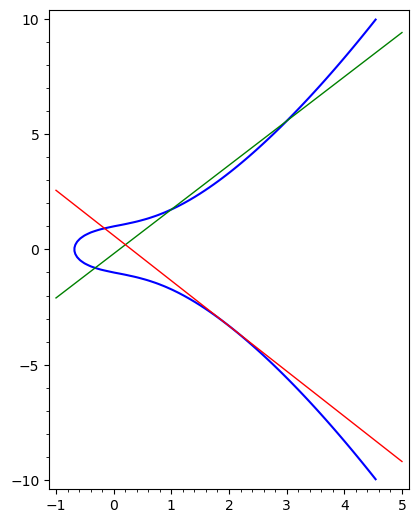

In [64]:
var('x y')
dib1=implicit_plot(y^2==x^3+x+1,(x,-1,5),(y,-10,10))
dib2=plot((x-1)*(sqrt(31)-sqrt(3))/2+sqrt(3),(x,-1,5),color='green')
dib3=plot(-(x-2)*(13/(2*sqrt(11)))-sqrt(11),(x,-1,5),color='red')
pretty_print(html('$y^2=x^3+x+1$'))
show(dib1+dib2+dib3, figsize=8,aspect_ratio=0.4)

Elliptic Curve defined by y^2 = x^3 + x + 1 over Finite Field of size 23

[(0 : 1 : 0), (0 : 1 : 1), (0 : 22 : 1), (1 : 7 : 1), (1 : 16 : 1), (3 : 10 : 1), (3 : 13 : 1), (4 : 0 : 1), (5 : 4 : 1), (5 : 19 : 1), (6 : 4 : 1), (6 : 19 : 1), (7 : 11 : 1), (7 : 12 : 1), (9 : 7 : 1), (9 : 16 : 1), (11 : 3 : 1), (11 : 20 : 1), (12 : 4 : 1), (12 : 19 : 1), (13 : 7 : 1), (13 : 16 : 1), (17 : 3 : 1), (17 : 20 : 1), (18 : 3 : 1), (18 : 20 : 1), (19 : 5 : 1), (19 : 18 : 1)]

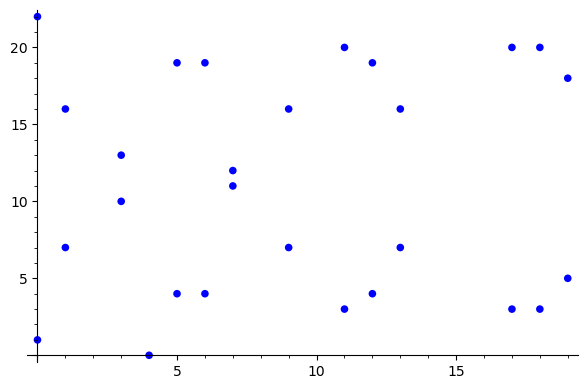

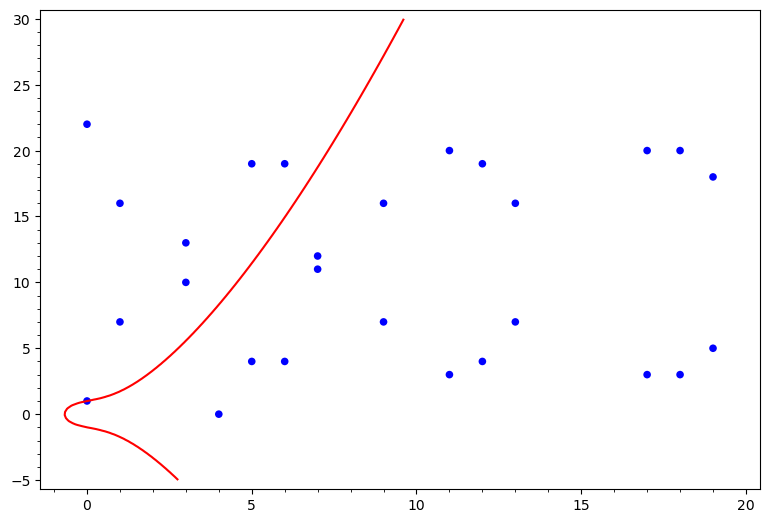

In [65]:
E23 = EllipticCurve(GF(23),[1,1])
show(E23)
pretty_print(E23.points())
puntos=points( ((0,1),(0 , 22 ), (1 , 7), (1 , 16 ), (3 ,10 ), (3 , 13) , (4 , 0 ), (5 , 4), (5 , 19), (6 , 4), (6 , 19 ), (7 , 11), (7 , 12), (9 , 7 ), (9 , 16 ),(11 , 3 ), (11 , 20), (12 , 4 ), (12 , 19 ), (13 , 7 ),(13 , 16), (17 , 3 ), (17 , 20), (18 , 3), (18 , 20 ),(19 , 5 ), (19 , 18)) ,size=30)
show(puntos)
curva=implicit_plot(y^2==x^3+x+1,(x,-1,20),(y,-5,30), color="red")
show(puntos+curva, figsize=8,aspect_ratio=0.4)

### Defino un curva

In [66]:
@interact(layout=dict(
                      top=[['Primo'],['A','B']]
                      )
          )
          
def _(Primo=prime_range(5,1000),A=-1,B=11):
    global Ep, a,b,p,puntos
    if is_prime(Primo) and mod(4*A**3+27*B**2,Primo)!=0:
        a=A
        b=B
        p=Primo
        Ep = EllipticCurve(GF(p),[a,b])
        puntos=points(((Ep.points()[i][0],Ep.points()[i][1]) for i in range(len(Ep.points()))),size=30)
        cardinal=Ep.cardinality()
        primalidadCardinal=is_prime(cardinal)
        pretty_print(html('$$%s \\pmod{%s}$$'%(latex(Ep),p)))
        pretty_print(html('El número de puntos de la curva es %s. ¿Es primo? %s'%(cardinal,primalidadCardinal)))
        show(puntos)
    elif is_prime(Primo)==False:
         pretty_print(html('Error: %s no es primo'%(Primo)))   
    else:
         pretty_print(html('Error: $4\\cdot%s^{3}+27\\cdot%s^{2}\\equiv 0\\mod %s$'%(A,B,Primo)))
            
            

Interactive function <function _ at 0x7f6bfd8c8d30> with 3 widgets
  Primo: Dropdown(description='Primo', opti…

### Opero con la curva definida

In [68]:
@interact(layout=dict(
                      top=[['P','Q']],
                      )
          )
          
def _(P=Ep.points()[1:],Q=Ep.points()[1:]): # La variable de control
    pretty_print(html('$$%s \\pmod{%s}$$'%(latex(Ep),p)))

    x1,y1=Integer(P[0]),Integer(P[1])
    x2,y2=Integer(Q[0]),Integer(Q[1])

    PQ=P+Q
    if PQ[2]==1:
        x3,y3 = Integer(PQ[0]), Integer(PQ[1])
        puntos_sumados=points( ((x1 , y1 ), (x2 ,y2 ), (x3 , y3 ), (x3 , p-y3 )),size=100, color='black')
        punto_suma=points( ((x3 , y3 )), size=200, color='purple')    
    else: #punto oo
        x3=x1
        y3=p+5
        puntos_sumados=points( ((x1 , y1 ), (x2 ,y2 ), (x3 , y3 )),size=100, color='black')
        punto_suma=points( ((x3 , y3 )), size=200, color='purple')

    if mod((x2-x1),p)!=0:
        pendiente=Integer(mod((y2-y1)*mod((x2-x1)**(-1),p),p))
    else:
        pendiente=Integer(mod((3*x1**2+a)*mod((2*y1)**(-1),p),p))
    
    if pendiente!=0:
        h=p/pendiente
        x0=x1+(p-y1)/pendiente
        
        k0=floor(x0/h)
        if k0!=(x0/h):
            x0=x0-k0*h
        else:
            x0=h
            k0=k0-1
        
        print('pendiente', pendiente, h, floor(x0/h), x0/h, k0, x0)

    else:
        x0=p
        h=p
        k0=0

    show(P,'+',Q,'=',PQ)
    #pretty_print(html('$y=%s(x-%s)+%s$)'%(pendiente,latex(ft),orden+1)))
    #show(y,'=',pendiente*(x-x1)+y1)
    pretty_print(html('$$y=%s\\;(x-%s)+%s$$'%(pendiente,x1,y1)))

    
    if PQ[2]==1: 
        rectas=plot(pendiente*(x-x1)+y1+k0*p,x,0,x0, color='green',linestyle='--')
        for k in range(0,max(1,pendiente-1)):
            rectas=rectas+plot(pendiente*(x-x1)+y1-(k+1-k0)*p,x,x0+h*(k),x0+h*(k+1), color='green',linestyle='--')
    else: #punto oo
        rectas=line([(x3 ,0),(x3,p)])    
    h2=line([(x3 ,0),(x3,p)], color='red',linestyle='dotted',thickness=3)
    
    show(puntos+h2+rectas+puntos_sumados+punto_suma)

Interactive function <function _ at 0x7f6bfdd5a1f0> with 2 widgets
  P: Dropdown(description='P', options=((0 …

 
   <h4 class="subsectionHead"><span class="titlemark">3.2   </span> <a 
 id="x1-170004.3"></a>Teorema de Hasse. Orden de un punto</h4>

**Teorema de Hasse** 
	Sea $E(\mathbb F_q)$ una curva elíptica sobre $\mathbb F_q$. Entonces
	$$
	q+1-2\sqrt q\leq \vert E(\mathbb F_q)\vert \leq q+1+2\sqrt q.
	$$

**Definicion:**
Orden de un punto $P \in E(\mathbb F_q)$: $n$ menor entero positivo  tal que $n\,P={\cal O}$.

**Nota:** El orden de un punto es un divisor del número de puntos de la curva.

 

In [69]:
NdeBits=16
p=next_probable_prime(randint(2**(NdeBits-1),2**NdeBits))
q=Integer(p)
print("p =",p)
EC = EllipticCurve(GF(q),[1,1])
Puntos=EC.points()
print('Número de puntos de la curva:', EC.cardinality())
print(ceil((q+1-2.*sqrt(q))),'<=',EC.cardinality(),'<=',floor((q+1+2.*sqrt(q))))

print('Ordenes posibles:',divisors(EC.cardinality()))
if EC.cardinality()<100:
    for P in Puntos:
        print(P,'Orden:',P.order())
else:
    for P in Puntos[:100]:
        print(P,'Orden:',P.order())


p = 55997
Número de puntos de la curva: 55940
55525 <= 55940 <= 56471
Ordenes posibles: [1, 2, 4, 5, 10, 20, 2797, 5594, 11188, 13985, 27970, 55940]
(0 : 1 : 0) Orden: 1
(0 : 1 : 1) Orden: 55940
(0 : 55996 : 1) Orden: 55940
(4 : 1833 : 1) Orden: 5594
(4 : 54164 : 1) Orden: 5594
(5 : 21066 : 1) Orden: 55940
(5 : 34931 : 1) Orden: 55940
(7 : 3704 : 1) Orden: 55940
(7 : 52293 : 1) Orden: 55940
(8 : 27878 : 1) Orden: 13985
(8 : 28119 : 1) Orden: 13985
(11 : 11959 : 1) Orden: 27970
(11 : 44038 : 1) Orden: 27970
(16 : 16813 : 1) Orden: 55940
(16 : 39184 : 1) Orden: 55940
(18 : 4396 : 1) Orden: 27970
(18 : 51601 : 1) Orden: 27970
(19 : 23994 : 1) Orden: 2797
(19 : 32003 : 1) Orden: 2797
(20 : 14159 : 1) Orden: 5594
(20 : 41838 : 1) Orden: 5594
(21 : 24699 : 1) Orden: 13985
(21 : 31298 : 1) Orden: 13985
(24 : 18753 : 1) Orden: 55940
(24 : 37244 : 1) Orden: 55940
(26 : 5016 : 1) Orden: 27970
(26 : 50981 : 1) Orden: 27970
(28 : 6007 : 1) Orden: 55940
(28 : 49990 : 1) Orden: 55940
(30 : 26775 : 1

 
 
 
 
 
 
   <h4 class="subsectionHead"><span class="titlemark">3.3   </span> <a 
 id="x1-180004.4"></a>DH sobre curvas elípticas</h4>
 
 Sea $E(\mathbb Z_p)$ un curva elíptica sobre $\mathbb Z_p$ y $P\in E(\mathbb Z_p)$ de orden $n$ suficientemente grande.

 

<div class="center" 
>
<!--l. 1257--><p class="noindent" >
<!--l. 1259--><p class="center" ><img 
src="logaritmo_discreto112x.png" alt="PICT" >
</div>

### Curva P-256 $p = 2^{256} − 2^{224} + 2^{192} + 2^{96} − 1$

<a href="http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf">http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf</a> Appendix D</h3>

In [76]:
p =     115792089210356248762697446949407573530086143415290314195533631308867097853951
orden = 115792089210356248762697446949407573529996955224135760342422259061068512044369
a=-3
b = 0x5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b
Gx=0x6b17d1f2e12c4247f8bce6e563a440f277037d812deb33a0f4a13945d898c296 
Gy=0x4fe342e2fe1a7f9b8ee7eb4a7c0f9e162bce33576b315ececbb6406837bf51f5
#Defino la curva
Zp= Zmod(p)
E = EllipticCurve(Zp,[a,b]);
# Defino el generador
G = E([Gx,Gy])

show(html('Curva P-256'))
show(html('$y^2=x^3-3\\,x + b\\mod p$'))
show(html('$p=2^{256} − 2^{224} + 2^{192} + 2^{96} − 1=$'+'${}$'.format(p)))
show(html('$b={}$'.format(b)))
show(html('Generador $G={}$'.format(G)))

print('Es el orden primo?',is_prime(orden))
print('El generador es de la curva? ', mod(Gy**2,p)==mod(Gx**3+a*Gx+b,p))


a=randint(1,orden)
b=randint(1,orden)

alpha=a*G
beta=b*G
show(html('Alicia envía $\\alpha={}$'.format(alpha)))
show(html('Benito envía $\\beta={}$'.format(beta)))

delta_a=a*beta
delta_b=b*alpha

print('Han llegado al mismo secreto?',delta_a==delta_b)
print(delta_a)

Curva P-256

\(y^2=x^3-3\,x + b\mod p\)

\(p=2^{256} − 2^{224} + 2^{192} + 2^{96} − 1=\)\(115792089210356248762697446949407573530086143415290314195533631308867097853951\)

\(b=41058363725152142129326129780047268409114441015993725554835256314039467401291\)

Generador \(G=(48439561293906451759052585252797914202762949526041747995844080717082404635286 : 36134250956749795798585127919587881956611106672985015071877198253568414405109 : 1)\)

Es el orden primo? True
El generador es de la curva?  True


Alicia envía \(\alpha=(114224902507754767676546978992047980205724650226754066896136166698249769191327 : 23423027369759205329756354563233777766621717995887143521271990748223595140198 : 1)\)

Benito envía \(\beta=(813039720700859582954073618034599495108665571106608984821586479345859306619 : 85247337661565745021558542343650061462794552718119845803027365954221857324740 : 1)\)

Han llegado al mismo secreto? True
(106955275520073563582984200073884604830358949030602731198340769713942221732794 : 15314142428367324354958251856048926010560698361692790398710912415912359107023 : 1)


   <h4 class="subsectionHead"><span class="titlemark">3.4   </span> <a 
 id="x1-180004.5"></a>ECDSA</h4>
 
 http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf


#### **Generación de claves**

Cada usuario realiza los siguientes pasos:

* Elige una curva elíptica sobre $\mathbb Z_p$, $E(\mathbb Z_p)$.
* Elige $G\in E(\mathbb Z_p)$ de orden $n$ grande.
* Elige $d\in[2,n-1]$ aleatorio.
* Calcula $Q=d\,G$.
* La clave pública es $\{E(\mathbb Z_p),G,n,Q\}$,
* La clave privada es $d$.

#### **Firma**

Para firmar un mensaje $m$ se realizan los siguientes pasos:

* Elige $k\in[2,n-1]$ aleatorio.¹
* Calcula $k\,G=(x_1,y_1)$ y $f_1=x_1\text{ mod } n$. Si $f_1=0$ se elige otro $k$.²
* Calcula $k^{-1} \text{ mod } n$.
* Calcula $f_2=k^{-1}(SHA(m)+f_1\, d) \text{ mod } n$. Si $f_2=0$ se toma otro $k$.
* La firma es el par $(f_1,f_2)$.

[¹] Sony PS3 Security Broken. PS3 Epic Fail
https://events.ccc.de/congress/2010/Fahrplan/events/4087.en.html
https://fahrplan.events.ccc.de/congress/2010/Fahrplan/attachments/1780_27c3_console_hacking_2010.pdf


[²] https://arstechnica.com/information-technology/2022/04/major-crypto-blunder-in-java-enables-psychic-paper-forgeries

#### **Verificación de la firma**

Para verificar que la firma $(f_1,f_2)$ del mensaje $m$
es de A se realizan los siguientes pasos:

* Se busca la clave pública de A, $\{E(\mathbb Z_p),G,n,Q\}$.
* Calcula $w=f_2^{-1} \text{ mod } n$.
* Calcula $u_1=SHA(m)\ w \text{ mod } n$.
* Calcula $u_2=f_1\ w \text{ mod } n$.
* Calcula $u_1 G+u_2 Q=(x_0,y_0)$ y $v=x_0 \text{ mod } n$.
* La firma es válida si $v=f_1$.


#### Curva P-256 $p = 2^{256} − 2^{224} + 2^{192} + 2^{96} − 1$

<a href="http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf">http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf</a> Appendix D</h3>

In [87]:
p =     115792089210356248762697446949407573530086143415290314195533631308867097853951
orden = 115792089210356248762697446949407573529996955224135760342422259061068512044369
a=-3
b = 0x5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b
Gx=0x6b17d1f2e12c4247f8bce6e563a440f277037d812deb33a0f4a13945d898c296 
Gy=0x4fe342e2fe1a7f9b8ee7eb4a7c0f9e162bce33576b315ececbb6406837bf51f5
#Defino la curva
Zp= Zmod(p)
E = EllipticCurve(Zp,[a,b]);
# Defino el generador
G = E([Gx,Gy])

show(html('Curva P-256'))
show(html('$y^2=x^3-3\\,x + b\\mod p$'))
show(html('$p=2^{256} − 2^{224} + 2^{192} + 2^{96} − 1=$'+'${}$'.format(p)))
show(html('$b={}$'.format(b)))
show(html('Generador $G={}$'.format(G)))


'''
Generación de claves
'''
d = randint(2, orden-1)
Q = d*G

show(html('Clave Pública Curva P-256 $Q={}$'.format(Q)))
show(html('Clave privada $d={}$'.format(d)))

'''
Firma
'''

def firma_aux(m,k):
    P_aux = k*G
    f1 = Integer(mod(P_aux[0], orden))
    f2 = Integer(mod(power_mod(k, -1, orden)*(m+f1*d), orden))
    return f1, f2

m = randint(0, orden-1)
k = randint(2, orden-1)
f1, f2 = firma_aux(m,k)
while f1*f2 == 0:
    k = randint(2, orden-1)
    f1, f2 = firma_aux(m,k)
show(html('Firma \n$f_1={}$ \n$f_2={}$'.format(f1, f2)))
        
'''
Verificación firma
'''
w = Integer(power_mod(f2, -1, orden))
u1 = Integer(mod(m*w, orden))
u2 = Integer(mod(f1*w, orden))
P_aux = u1*G + u2*Q
v = Integer(mod(P_aux[0], orden))

verificacion = v==f1
show(html('Es válida la firma? {}'.format(verificacion)))


Curva P-256

\(y^2=x^3-3\,x + b\mod p\)

\(p=2^{256} − 2^{224} + 2^{192} + 2^{96} − 1=\)\(115792089210356248762697446949407573530086143415290314195533631308867097853951\)

\(b=41058363725152142129326129780047268409114441015993725554835256314039467401291\)

Generador \(G=(48439561293906451759052585252797914202762949526041747995844080717082404635286 : 36134250956749795798585127919587881956611106672985015071877198253568414405109 : 1)\)

Clave Pública Curva P-256 \(Q=(74175148159468375525476416772897235276588153840822998664071212299763996977849 : 69024814254531333246496732168894057681669850731210187541781720771701438218649 : 1)\)

Clave privada \(d=31479191803046240376358554699212778796246614470807978270255870959941471592507\)

Firma 
\(f_1=24923171941847244884225725278170971328605458588687074120227275505862970414830\) 
\(f_2=17084474090683778779294238772865821784571426909387778584406603688219766470948\)

Es válida la firma? True



#### **Curva p-256:**  $p=2^{256}-2^{224}+2^{192}+2^{96}-1$
 http://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf

Curva pseudo aleatoria $y^2 = x^3 - 3x + b \text{ mod } p$:
* primo $p$ 115792089210356248762697446949407573530086143415290314195533631308867097853951
* orden $r$ 115792089210356248762697446949407573529996955224135760342422259061068512044369
* cofactor $h=1$
* semilla de 160 bits usada para generar el coeficiente $b$,   $semilla=c49d360886e704936a6678e1139d26b7819f7e90$
* parámetro $c$ del algoritmo usado para generar el coeficiente
  $b$, $c=7efba1662985be9403cb055c75d4f7e0ce8d84a9c5114abcaf3177680104fa0d$
* coeficiente $b$ que satisface $b^2c\equiv -27 \text{ mod } p$, $b=5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b$,
* punto $G=(G_x,G_y)$ de orden $n=r/h$
  $G_x= 6b17d1f2e12c4247f8bce6e563a440f277037d812deb33a0f4a13945d898c296$,  $G_y=4fe342e2fe1a7f9b8ee7eb4a7c0f9e162bce33576b315ececbb6406837bf51f5$

$p$ y $r$ están en decimal, el resto en hexadecimal.

#### **ECDSA: Generación de una curva aleatoria**


* **Input** $p$, primo impar.
* **Output** cadena binaria $semilla$ de 160 o más bits, $a,\ b\in \mathbb{Z}_p$ que definen una curva elíptica sobre $\mathbb{Z}_p$.
    1. Sean $t=\lceil \log_2 p\rceil$, $s=\lfloor (t -1)/160\rfloor$, $v = t-160 s$.
    1. Elegir  $semilla$ aleatorio de longitud $g\geq 160$. 
    1. Calcular $H$ = SHA($semilla$) y sea $c_0$ la cadena de los $v$ bits menos significativos de $H$ ($v$ *rightmost bits*).
    1. Sea $W_0$ la cadena de $v$ bits obtenidos haciendo 0 el bit más significativo (*leftmost*) de $c_0$. (Así nos aseguramos que $c<p$.)
    1. Sea $z$ el entero cuya expesión en binario es $semilla$.
    1. Para $i$ desde 1 hasta $s$:
        - Sea $s_i$ la expresión binaria del entero $(z + i) \text{ mod } 2^g$.
        - Calcular $W_i$ = SHA($s_i$).
    1. Sea $W=W_0\|W_1\|\cdots\|W_s$.
    1. Sea $c$ entero que tiene por representación binaria $W$.
    1. Si $c=0$ o $4c+27\equiv 0 \text{ mod } p$ volver al punto 2.
    1. Elegir $a,\ b\in \mathbb{Z}^*_p$, tales que
        $b^2c \equiv a^3\text{ mod } p$.
* **Salida** $semilla$, $a$, $b$.

#### **ECDSA: Verificación de una curva**

Dada una curva elíptica es conveniente comprobar que los parámetros son correctos.

1. Verificar que $p$ es un primo impar.
1. Verificar que $G$ no es el punto del infinito ${\cal O}$.
1. Verificar que $a$, $b$, $G_x$ y $G_y$ son enteros en el intervalo $[0,p-1]$.
1. Según el caso, verificar que la curva se ha obtenido aleatoriamente.
1. Verificar que $a$ y $b$ definen una curva elíptica sobre $\mathbb{Z}_p$, $4a^3+27b^2\not\equiv 0 \text{ mod } p$.
1. Verificar que $G$ pertenece a la curva,
    $G_y^2\equiv G_x^3+a\,G_x+b \text{ mod } p$
1. Verificar que $r=n\,h$.
1. Verificar que $n$ es primo.
1. Verificar $n\,G={\cal O}$.
1. Verificar que $n> 2^{160}$ y $n > 4 \sqrt{p}$.
1. Comprobar que $h=\lfloor (\sqrt{p}+1)^2/n \rfloor$.
1. Verificar que $n$ no divide $p^k-1$, $1\leq k\leq 20$.
1. Verificar que $n\neq p$.


Los item 9, 10 y 11 permiten
comprobar que el número de puntos de la curva es el correcto.


#### **ECDSA: Verificación de una clave ECDSA**



Dada una clave ECDSA (un punto $Q$ de la curva) es conveniente comprobar es correcta.

* Verificar que $Q$ no es el punto del infinito ${\cal O}$.
* Verificar que $Q_x$ y $Q_y$ son enteros en el intervalo $[0,p-1]$.
* Verificar que $Q$ pertenece a la curva,
    $Q_y^2\equiv Q_x^3+a\,Q_x+b \text{ mod } p$
* Verificar $n\,Q={\cal O}$.




#### **Reducción módulos especiales**, p.e. $p=2^{192}-2^{64}-1$

  Si $x<p^2$, $x=x_5 2^{320}+x_4 2^{256}+x_3 2^{192}+x_2 2^{128}+x_1 2^{64}+x_0$,   siendo $x_i<2^{64}$.

  Teniendo en cuenta
  \begin{eqnarray*}
  2^{192} &\equiv& 2^{64} +1 \mod p\\
  2^{256} &\equiv& 2^{128}+2^{64}  \mod p\\
  2^{320} &\equiv& 2^{192}+2^{128}  \mod p
  \end{eqnarray*}
  tenemos
  \begin{eqnarray*}
    x &\equiv& x_4 2^{256}+(x_5+x_3) 2^{192}+(x_5+x_2) 2^{128}+x_1 2^{64}+x_0 \mod p\\
    x &\equiv& (x_5+x_3) 2^{192}+(x_5+x_4+x_2) 2^{128}+(x_4+x_1) 2^{64}+x_0 \mod p\\
    x &\equiv& (x_5+x_4+x_2) 2^{128}+(x_5+x_4+x_3+x_1) 2^{64}+x_5+x_3+x_0 \mod p
  \end{eqnarray*}
  
  Si fuera necesario, $x \equiv p-(x_5+x_4+x_2) 2^{128}+(x_5+x_4+x_3+x_1) 2^{64}+x_5+x_3+x_0 \mod p$

   <h4 class="subsectionHead"><span class="titlemark">3.5   </span> <a 
 id="x1-200004.6"></a>Seguridad</h4>

La seguridad se basa en la dificultad de calcular el logaritmo discreto
en curvas elípticas que en este caso se puede enunciar:

Dados $E(\mathbb Z_p)$, $Q$, $P\in E(\mathbb Z_p)$ hallar $k$, entero positivo, tal
que 
$$
k\,P=Q.
$$

Este problema no es tan fácil como en $\mathbb Z_p^*$.

                                                                     

<h4>Baby-step, Giant-step</h4>

In [1]:
p=211
E = EllipticCurve(GF(211),[1,1])
E.points()
n=E.cardinality()

Alpha=E.points()[3] #generador
M=ceil(sqrt(n-1)); 
gM=(n-M)*Alpha; 
Tabla=[[i*Alpha,i] for i in range(0,M)]; 
Tabla_ordenada=sorted(Tabla, key=lambda coordenada: coordenada[0][0])

show(html('Curva'))
show(html('$y^2=x^3-x + 1\\mod {}$'.format(p)))
show(html('Generador $G={}$'.format(Alpha)))


print ("El orden es",n)
#print M;
#print range(0,M)
print ("\nTabla construida:  ", Tabla,"\n")
print ("\nTabla de búsqueda: \n", Tabla_ordenada,"\n")

Beta=E.points()[55] #punto del que queremos calcular el logaritmo discreto
print( "Elemento del que queremos calcular LD: ",Beta,"\n")

Gamma=Beta;

#t1=walltime();
fin=False;
i=0;
while i in range(0,M) and not(fin):
    print (i," Punto buscado en la tabla: ",Gamma)
    for j in range(0,M):
        if Gamma==Tabla[j][0]:
            x=i*M+j;
            print ("\nLogaritmo Discreto de",Beta,"en base",Alpha, "es:",i,"*",M,"+",j,"=",x)
            show(x,"*",Alpha,"=",x*Alpha,"==",Beta, Beta==x*Alpha)
            #print(walltime(t1));
            fin=True;
            break;
    Gamma=Gamma+gM;
    i=i+1;        
#print(walltime(t1));

Curva

\(y^2=x^3-x + 1\mod 211\)

Generador \(G=(2 : 86 : 1)\)

El orden es 223

Tabla construida:   [[(0 : 1 : 0), 0], [(2 : 86 : 1), 1], [(43 : 209 : 1), 2], [(175 : 28 : 1), 3], [(207 : 12 : 1), 4], [(201 : 62 : 1), 5], [(12 : 105 : 1), 6], [(93 : 142 : 1), 7], [(14 : 4 : 1), 8], [(60 : 29 : 1), 9], [(142 : 168 : 1), 10], [(4 : 160 : 1), 11], [(97 : 197 : 1), 12], [(185 : 40 : 1), 13], [(45 : 190 : 1), 14]] 


Tabla de búsqueda: 
 [[(0 : 1 : 0), 0], [(2 : 86 : 1), 1], [(4 : 160 : 1), 11], [(12 : 105 : 1), 6], [(14 : 4 : 1), 8], [(43 : 209 : 1), 2], [(45 : 190 : 1), 14], [(60 : 29 : 1), 9], [(93 : 142 : 1), 7], [(97 : 197 : 1), 12], [(142 : 168 : 1), 10], [(175 : 28 : 1), 3], [(185 : 40 : 1), 13], [(201 : 62 : 1), 5], [(207 : 12 : 1), 4]] 

Elemento del que queremos calcular LD:  (50 : 75 : 1) 

0  Punto buscado en la tabla:  (50 : 75 : 1)
1  Punto buscado en la tabla:  (170 : 205 : 1)
2  Punto buscado en la tabla:  (163 : 66 : 1)
3  Punto buscado en la tabla:  (63 : 42 : 1)
4  Punto buscado en la tabla:  (125 : 92 : 1)
5  Punto buscado en la tab

203 '*' (2 : 86 : 1) '=' (50 : 75 : 1) '==' (50 : 75 : 1) True